In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train),(X_teat, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [4]:
len(X_train)

60000

In [6]:
len(X_teat)

10000

In [16]:
X_train[0].shape

(28, 28)

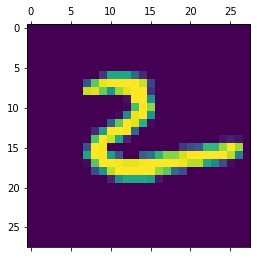

In [15]:
plt.matshow(X_train[109])

In [17]:
y_train[109]

2

# We have to chage a two dimetional array into one dimentional array

In [25]:
X_train=X_train/255
X_teat=X_teat/255
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_teat_flattened=X_teat.reshape(len(X_teat), 28*28)

# Now, we will create a neural network

In [26]:
NN=keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmiod')])

# we don't need input shape in 2nd layer
# 100 in the num of neurons, there is no hard and fast rule for no. of neurons.
# #should be less than input shape
NN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

NN.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4690 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9261


In [27]:
NN.evaluate(X_teat_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9267


[0.26685482263565063, 0.9266999959945679]

# Model Prediction

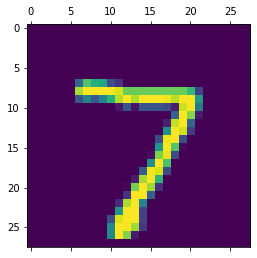

In [28]:
plt.matshow(X_teat[0])

In [29]:
y_pred=NN.predict(X_teat_flattened)

313/313 [==============================] - 1s 1ms/step


In [30]:
y_pred[0]

array([3.17137912e-02, 4.34963340e-07, 4.53729406e-02, 9.65190709e-01,
       3.32547841e-03, 1.41866356e-01, 2.26372617e-06, 9.99708116e-01,
       1.13739505e-01, 6.18489265e-01], dtype=float32)

In [31]:
np.argmax(y_pred[0])

7

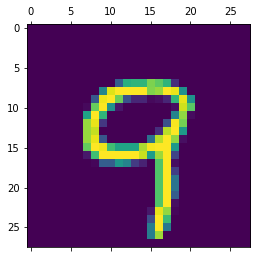

In [32]:
plt.matshow(X_teat[105])

In [33]:
y_pred[105]

array([2.6796127e-03, 4.3692060e-05, 2.3071267e-02, 2.2686018e-02,
       5.1945138e-01, 4.6691179e-02, 2.8486229e-03, 2.9260555e-01,
       1.8025652e-01, 9.7990417e-01], dtype=float32)

In [34]:
np.argmax(y_pred[105])

9

# Confusion Metrics

In [35]:
y_pred_label= [np.argmax(i) for i in y_pred]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    6,    1,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,    7,  930,   15,    7,    5,   12,    9,   36,    4],
       [   3,    0,   23,  918,    1,   30,    2,    6,   20,    7],
       [   1,    1,    8,    1,  911,    0,   10,    3,   10,   37],
       [   8,    3,    3,   24,    7,  797,   12,    3,   29,    6],
       [  13,    3,    7,    1,    7,   15,  909,    1,    2,    0],
       [   2,    6,   26,    8,    9,    1,    0,  933,    2,   41],
       [   7,    8,    6,   25,    9,   32,    9,    6,  864,    8],
       [  11,    7,    1,   12,   25,    8,    0,   11,    5,  929]])>

# Adding Layer

In [ ]:
NN=keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                    keras.layers.Dense(10, activation='sigmoid')])

# we don't need input shape in 2nd layer
# 100 in the num of neurons, there is no hard and fast rule for no. of neurons.
# #should be less than input shape
NN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

NN.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
keras.